### Завантаження та огляд файлів

In [1]:
import pandas as pd
import numpy as np 

data = pd.DataFrame(pd.read_csv("heart_2022_no_nans.csv"))

print(data.describe(include="all"))

data.head()

# Унікальні значення категоріальних стовпців
for col in data:
    if data.dtypes[col] == object:
        print(f"{col}: {data[col].unique()}")

             State     Sex GeneralHealth  PhysicalHealthDays  \
count       246022  246022        246022       246022.000000   
unique          54       2             5                 NaN   
top     Washington  Female     Very good                 NaN   
freq         15000  127811         86999                 NaN   
mean           NaN     NaN           NaN            4.119026   
std            NaN     NaN           NaN            8.405844   
min            NaN     NaN           NaN            0.000000   
25%            NaN     NaN           NaN            0.000000   
50%            NaN     NaN           NaN            0.000000   
75%            NaN     NaN           NaN            3.000000   
max            NaN     NaN           NaN           30.000000   

        MentalHealthDays                                    LastCheckupTime  \
count      246022.000000                                             246022   
unique               NaN                                                 

### Конвертація значень

In [2]:
data = data.drop(columns=["State"])
data = data.replace("Female", "0")
data = data.replace("Male", "1")
data["AgeCategory"] = data["AgeCategory"].str[4:6]

data["GeneralHealth"] = data["GeneralHealth"].replace({"Poor":"0", "Fair":"1", "Good":"2", "Very good":"3", "Excellent":"4"})
data["LastCheckupTime"] = data["LastCheckupTime"].replace({"Within past year (anytime less than 12 months ago)":"0",
                                                           "Within past 2 years (1 year but less than 2 years ago)": "1",
                                                          "Within past 5 years (2 years but less than 5 years ago)": "2",
                                                          "5 or more years ago": "3"})

data["RemovedTeeth"] = data["RemovedTeeth"].replace({"All": "3", 
                                                     "6 or more, but not all": "2",
                                                     "1 to 5": "1",
                                                     "None of them": "0"
                                                    })


data["HadDiabetes"] = data["HadDiabetes"].replace({"No":"0",
                                                  "No, pre-diabetes or borderline diabetes": "1",
                                                  "Yes, but only during pregnancy (female)": "2",
                                                  "Yes": "3"})

data["SmokerStatus"] = data["SmokerStatus"].replace({"Never smoked": "0",
                                                    "Former smoker": "1",
                                                    "Current smoker - now smokes some days": "2",
                                                    "Current smoker - now smokes every day": "3"})

data["ECigaretteUsage"] = data["ECigaretteUsage"].replace({"Never used e-cigarettes in my entire life": "0",
                                                          "Not at all (right now)": "1",
                                                          "Use them some days": "2",
                                                          "Use them every day":"3"})

data["TetanusLast10Tdap"] = data["TetanusLast10Tdap"].replace({"No, did not receive any tetanus shot in the past 10 years": "0",
                                                              "Yes, received tetanus shot but not sure what type": "1",
                                                              "Yes, received tetanus shot, but not Tdap": "2",
                                                              "Yes, received Tdap": "3"})
data["CovidPos"] = data["CovidPos"].replace({"No":"0", 
                                             "Tested positive using home test without a health professional": "1",
                                             "Yes": "2"})

data = data.replace({"No":"0",
                     "Yes": "1"})

data.iloc[0]

Sex                                                 0
GeneralHealth                                       3
PhysicalHealthDays                                4.0
MentalHealthDays                                  0.0
LastCheckupTime                                     0
PhysicalActivities                                  1
SleepHours                                        9.0
RemovedTeeth                                        0
HadHeartAttack                                      0
HadAngina                                           0
HadStroke                                           0
HadAsthma                                           0
HadSkinCancer                                       0
HadCOPD                                             0
HadDepressiveDisorder                               0
HadKidneyDisease                                    0
HadArthritis                                        1
HadDiabetes                                         0
DeafOrHardOfHearing         

### Видалення відсутніх значень

In [3]:
data.isnull().sum()

Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
AlcoholD

### Попередній аналіз даних (EDA)

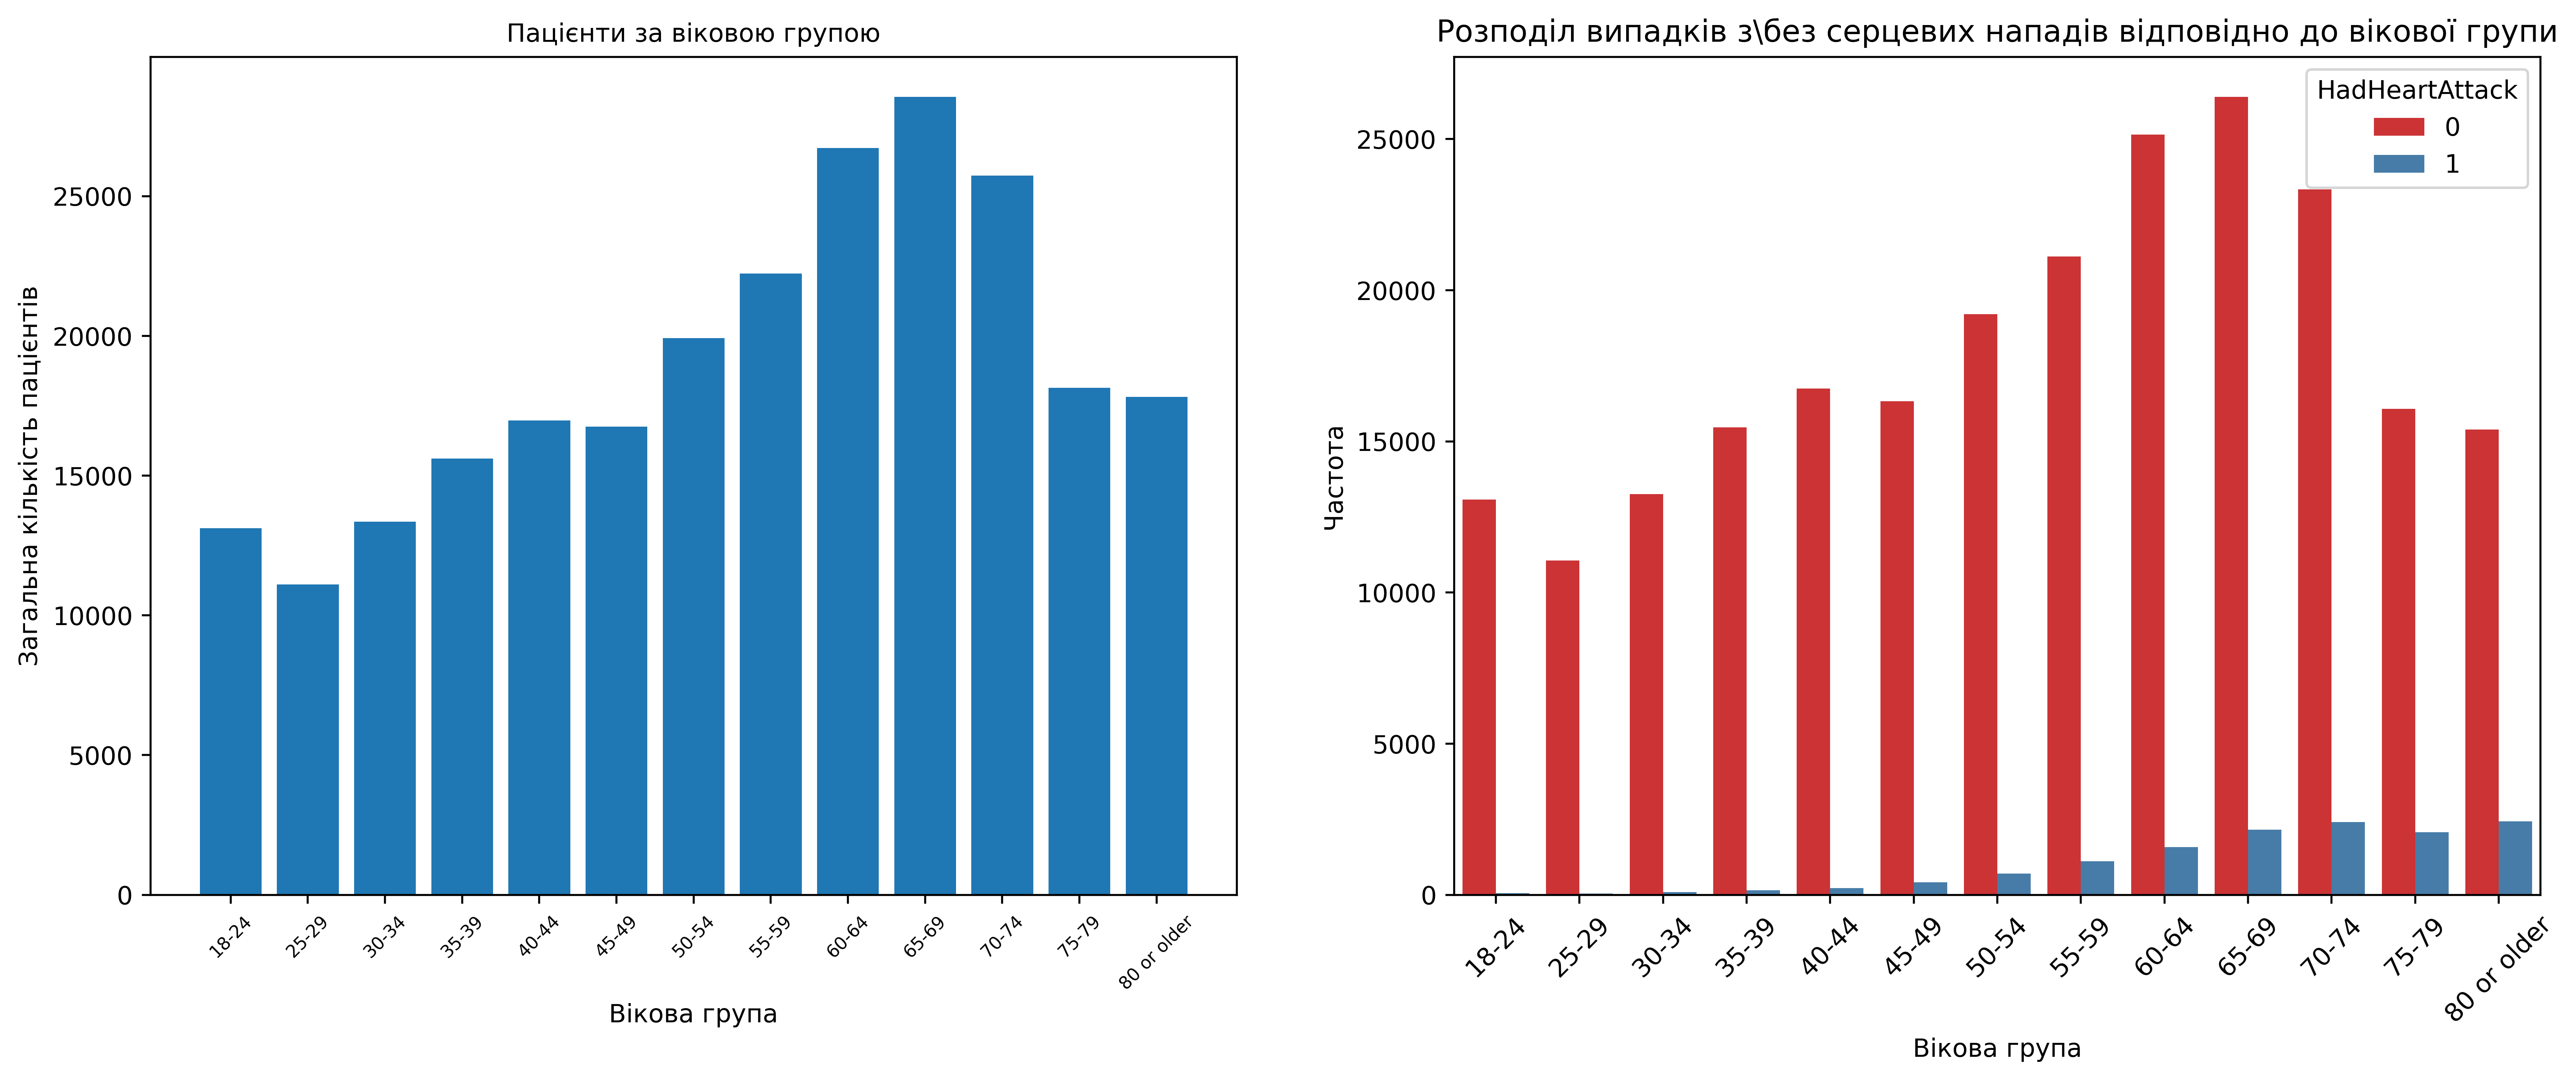

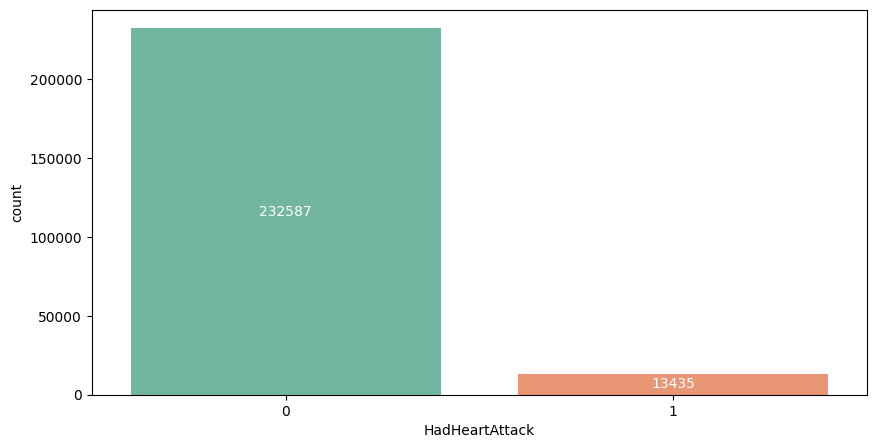

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

color_catplot=["Crimson","DimGray"]

age_category = data.groupby(["AgeCategory"])
data["AgeCategory"]

group_by_age = {}
for age, group in age_category:
    group_by_age[age] = group["AgeCategory"].count()

x_axis = np.arange(0, len(group_by_age.keys()) )
ageCategories = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']

fig, axes = plt.subplots(1, 2, figsize=(17, 6), dpi=500)

age_groups_ax = plt.subplot(1, 2, 1)
bars = plt.bar(x_axis, list(group_by_age.values()))

age_groups_ax.set_xticks(x_axis)
age_groups_ax.set_xticklabels(ageCategories, size=7)

age_groups_ax.set_title("Пацієнти за віковою групою", size=10)
age_groups_ax.set_xlabel("Вікова група")
age_groups_ax.set_ylabel("Загальна кількість пацієнтів")
plt.xticks(rotation=45)

heart_disease_ax = plt.subplot(1,2,2 )     
order = pd.unique(data.AgeCategory.values)
order.sort()
bars = sns.countplot(data=data, x='AgeCategory', hue='HadHeartAttack', palette='Set1', order=order)
plt.title("Розподіл випадків з\без серцевих нападів відповідно до вікової групи")
plt.xlabel('Вікова група')
heart_disease_ax.set_xticks(x_axis)
heart_disease_ax.set_xticklabels(ageCategories)
plt.ylabel('Частота')
plt.xticks(rotation=45)

plt.show()

plt.figure(figsize = (10,5))
ax=sns.countplot(data=data , x = 'HadHeartAttack', hue='HadHeartAttack', legend=False,  palette="Set2")
for container in ax.containers:
    ax.bar_label(container, label_type='center', rotation=0, color='white')
plt.show()


**Дані є незбалансованими**: приблизно 94.5% записів відповідають "No" і лише 5.5% - "Yes".

### Тренування моделі
Спочатку спробуємо створити модель на базі існуючих даних, без балансування

In [5]:
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
data1 = data.copy(deep = True)


col = list(data.columns)
categorical_features = []
numerical_features = []
for i in data1.columns:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        data1[i]=le.fit_transform(data1[i])
        categorical_features.append(i)

In [6]:
X=data1.drop(['HadHeartAttack',"RaceEthnicityCategory"], axis=1)
y=data1['HadHeartAttack']

In [7]:
X_train , X_test, y_train,  y_test = train_test_split(X, y, test_size=0.35, random_state=0)

scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_ss=LogisticRegression(solver="liblinear", penalty="l2", C=0.00001, max_iter=10000)
logreg_ss.fit(X_train_scaled,y_train)
y_pred_log=logreg_ss.predict(X_test_scaled)

y_pred_proba_log = logreg_ss.predict_proba(X_test_scaled)
fpr_log, tpr_log, _ = metrics.roc_curve(y_test, y_pred_proba_log[:,1])
auc_log = round(metrics.auc(fpr_log, tpr_log),5)


simple_log = pd.DataFrame(data=[accuracy_score(y_test, y_pred_log),
                          precision_score(y_test, y_pred_log, average='binary'),
                          recall_score(y_test, y_pred_log, average='binary'),
                          f1_score(y_test, y_pred_log, average='binary'),
                          roc_auc_score(y_test, y_pred_proba_log[:,1])],
                          index=['Accuracy','Precision','Recall','F1-score','AUC'],
                          columns = ["Logestic_regression_simple"])

simple_log

,Logestic_regression_simple
Accuracy,0.945266
Precision,0.497637
Recall,0.358740
F1-score,0.416924
AUC,0.886588


Модель має високу точність, 94%. Але в той же час низьку точність у визначенні позитивних зразків.
Інакше кажучи модель має велику кількість хибнопозитивних та хибнонегативних результатів. Цю проблему можна вирішити балансуванням класів.

Для балансування я спробував 4 різних метода: Random Oversampling, SMOTE, ADASYN та K-means SMOTE. Для найкращого провів тюнінг гіперпараметрів моделі.

### Random Oversampling

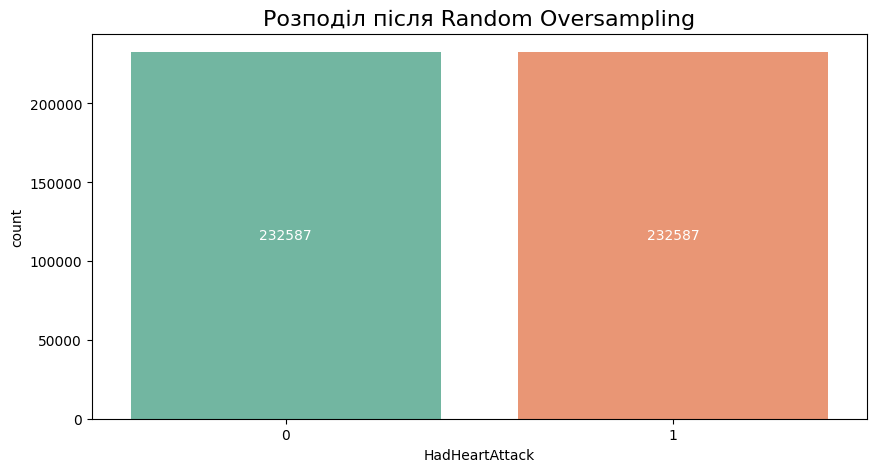

In [8]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')

X_ROS, y_ROS = oversample.fit_resample(X, y)

plt.figure(figsize = (10,5))
ax=sns.countplot(x = y_ROS, hue=y_ROS, legend=False, palette="Set2")
for container in ax.containers:
    ax.bar_label(container, label_type='center', rotation=0, color='white')
plt.title("Розподіл після Random Oversampling", size=16)    
plt.show()

In [9]:
X_train , X_test, y_train,  y_test = train_test_split(X_ROS, y_ROS, test_size=0.35, random_state=0)

scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_s=LogisticRegression(solver="liblinear", penalty="l2", C=0.00001, max_iter=10000)
logreg_s.fit(X_train_scaled,y_train)
y_pred_log=logreg_s.predict(X_test_scaled)

y_pred_proba_log = logreg_s.predict_proba(X_test_scaled)
fpr_log, tpr_log, _ = metrics.roc_curve(y_test, y_pred_proba_log[:,1])
auc_log = round(metrics.auc(fpr_log, tpr_log),5)


ROS_log = pd.DataFrame(data=[accuracy_score(y_test, y_pred_log),
                             precision_score(y_test, y_pred_log, average='binary'),
                             recall_score(y_test, y_pred_log, average='binary'),
                             f1_score(y_test, y_pred_log, average='binary'),
                             roc_auc_score(y_test, y_pred_proba_log[:,1])],
                             index=['Accuracy','Precision','Recall','F1-score','AUC'],
                             columns = ["Logestic_regression_ROS"])

ROS_log

,Logestic_regression_ROS
Accuracy,0.793220
Precision,0.803403
Recall,0.774858
F1-score,0.788872
AUC,0.876647


### SMOTE

D:\PythonEnvs\Ml_Jupyter\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\PythonEnvs\Ml_Jupyter\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


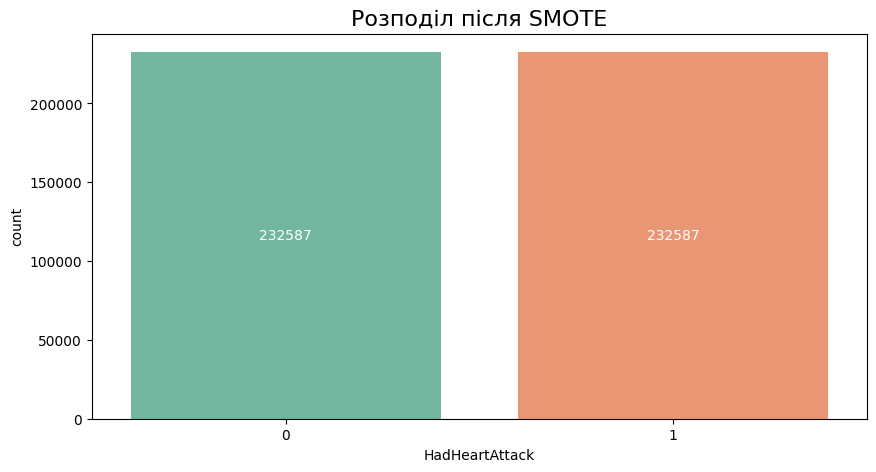

In [10]:
from  imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors
import threadpoolctl

# Налаштування багатопоточності
with threadpoolctl.threadpool_limits(limits=1, user_api='blas'):
    smote = SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=NearestNeighbors(n_jobs=-1))
    X_smote, y_smote = smote.fit_resample(X, y)

plt.figure(figsize=(10, 5))
ax = sns.countplot(x=y_smote, hue=y_smote, palette="Set2", legend=False)
for container in ax.containers:
    ax.bar_label(container, label_type='center', rotation=0, color='white')
plt.title("Розподіл після SMOTE", size=16)
plt.show()

In [11]:
X_train , X_test, y_train,  y_test = train_test_split(X_smote, y_smote, test_size=0.35, random_state=0)

scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_s=LogisticRegression(solver="liblinear", penalty="l2", C=0.00001, max_iter=10000)
logreg_s.fit(X_train_scaled,y_train)
y_pred_log=logreg_s.predict(X_test_scaled)

y_pred_proba_log = logreg_s.predict_proba(X_test_scaled)
fpr_log, tpr_log, _ = metrics.roc_curve(y_test, y_pred_proba_log[:,1])
auc_log = round(metrics.auc(fpr_log, tpr_log),5)


Smote_log = pd.DataFrame(data=[accuracy_score(y_test, y_pred_log),
                               precision_score(y_test, y_pred_log, average='binary'),
                               recall_score(y_test, y_pred_log, average='binary'),
                               f1_score(y_test, y_pred_log, average='binary'),
                               roc_auc_score(y_test, y_pred_proba_log[:,1])],
                               index=['Accuracy','Precision','Recall','F1-score','AUC'],
                               columns = ["Logestic_regression_Smote"])

Smote_log

,Logestic_regression_Smote
Accuracy,0.828605
Precision,0.821019
Recall,0.839154
F1-score,0.829988
AUC,0.907296


### ADASYN

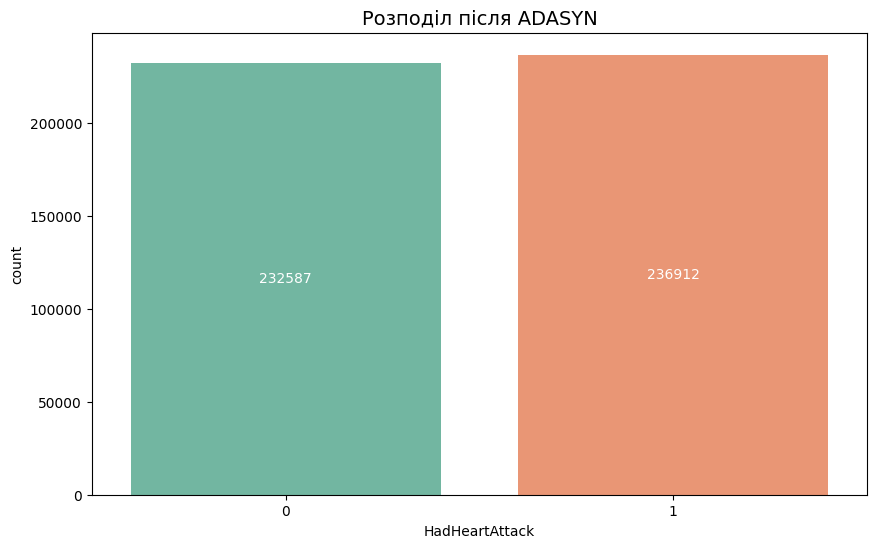

In [12]:
from  imblearn.over_sampling import ADASYN 

adasyn  = ADASYN (n_neighbors=NearestNeighbors(n_jobs=-1), random_state=0)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)


plt.figure(figsize = (10,6))
ax=sns.countplot( x = y_adasyn, hue=y_adasyn, palette="Set2", legend=False)
for container in ax.containers:
    ax.bar_label(container, label_type='center', rotation=0, color='white')
plt.title("Розподіл після ADASYN", size=14)
plt.show()

In [13]:
X_train , X_test, y_train,  y_test = train_test_split(X_adasyn, y_adasyn, test_size=0.35, random_state=0)

scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_s=LogisticRegression(solver="liblinear", penalty="l2", C=0.00001, max_iter=10000)
logreg_s.fit(X_train_scaled,y_train)
y_pred_log=logreg_s.predict(X_test_scaled)

y_pred_proba_log = logreg_s.predict_proba(X_test_scaled)
fpr_log, tpr_log, _ = metrics.roc_curve(y_test, y_pred_proba_log[:,1])
auc_log = round(metrics.auc(fpr_log, tpr_log),5)


adasyn_log = pd.DataFrame(data=[accuracy_score(y_test, y_pred_log),
                                precision_score(y_test, y_pred_log, average='binary'),
                                recall_score(y_test, y_pred_log, average='binary'),
                                f1_score(y_test, y_pred_log, average='binary'),
                                roc_auc_score(y_test, y_pred_proba_log[:,1])],
                                index=['Accuracy','Precision','Recall','F1-score','AUC'],
                                columns = ["Logestic_regression_adasyn"])

adasyn_log

,Logestic_regression_adasyn
Accuracy,0.827014
Precision,0.820534
Recall,0.840153
F1-score,0.830228
AUC,0.905391


### K-means SMOTE

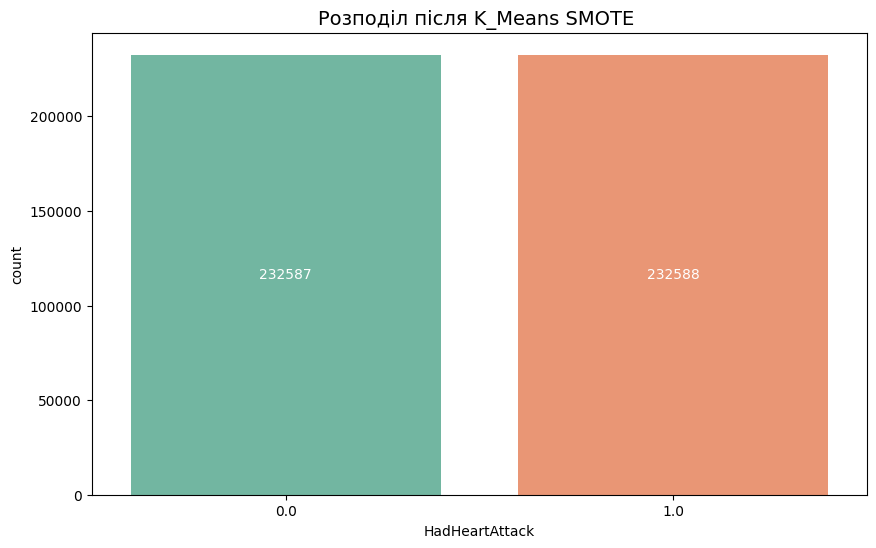

In [14]:
from  imblearn.over_sampling import KMeansSMOTE

KSMOTE  = KMeansSMOTE(cluster_balance_threshold=0.1)
X_KSMOTE, y_KSMOTE = KSMOTE.fit_resample(X, y)


plt.figure(figsize = (10,6))
ax=sns.countplot( x = y_KSMOTE, hue=y_adasyn, palette="Set2", legend=False)
for container in ax.containers:
    ax.bar_label(container, label_type='center', rotation=0, color='white')
plt.title("Розподіл після K_Means SMOTE ", size=14)
plt.show()

In [15]:
X_train , X_test, y_train,  y_test = train_test_split(X_KSMOTE, y_KSMOTE , test_size=0.35, random_state=0)

scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_s=LogisticRegression(solver="liblinear", penalty="l2", C=0.00001, max_iter=10000)
logreg_s.fit(X_train_scaled,y_train)
y_pred_log=logreg_s.predict(X_test_scaled)

y_pred_proba_log = logreg_s.predict_proba(X_test_scaled)
fpr_log, tpr_log, _ = metrics.roc_curve(y_test, y_pred_proba_log[:,1])
auc_log = round(metrics.auc(fpr_log, tpr_log),5)


KSMOTE_log = pd.DataFrame(data=[accuracy_score(y_test, y_pred_log),
                                precision_score(y_test, y_pred_log, average='binary'),
                                recall_score(y_test, y_pred_log, average='binary'),
                                f1_score(y_test, y_pred_log, average='binary'),
                                roc_auc_score(y_test, y_pred_proba_log[:,1])],
                                index=['Accuracy','Precision','Recall','F1-score','AUC'],
                                columns = ["Logestic_regression_Ksmote"])

KSMOTE_log

,Logestic_regression_Ksmote
Accuracy,0.928906
Precision,0.914510
Recall,0.945819
F1-score,0.929901
AUC,0.973384


Балансування класів за допомогою K-means SMOTE дало найкращі результат, досягаючи загальної точності у 92%.
Тепер можна спробувати оптимізувати модель, підбираючи найкращі гіперпараметри. Для цього я використовую GridSearchCV

### GridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

X_train, X_test, y_train, y_test = train_test_split(X_KSMOTE, y_KSMOTE, test_size=0.35, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga']
}

logreg = LogisticRegression(penalty='l2', max_iter=10000)

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring=make_scorer(f1_score), n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Найкращі параметри:", best_params)

logreg_best = grid_search.best_estimator_
logreg_best.fit(X_train_scaled, y_train)
y_pred_log = logreg_best.predict(X_test_scaled)
y_pred_proba_log = logreg_best.predict_proba(X_test_scaled)

# Оцінка моделі
KSMOTE_log = pd.DataFrame(data=[accuracy_score(y_test, y_pred_log),
                                precision_score(y_test, y_pred_log, average='binary'),
                                recall_score(y_test, y_pred_log, average='binary'),
                                f1_score(y_test, y_pred_log, average='binary'),
                                roc_auc_score(y_test, y_pred_proba_log[:,1])],
                                index=['Accuracy','Precision','Recall','F1-score','AUC'],
                                columns = ["Logistic_regression_Ksmote"])

print(KSMOTE_log)

Найкращі параметри: {'C': 1, 'solver': 'saga'}
           Logistic_regression_Ksmote
Accuracy                     0.940698
Precision                    0.936681
Recall                       0.944932
F1-score                     0.940788
AUC                          0.979904


Застовування GridSearchCV дозволило підвищини загальну точність моделі на кілька пунктів по всім параметрам, досягаючи загальної точності у 94%.

### Витягування вагів

In [17]:
coefficients = logreg_best.coef_[0]
intercept = logreg_best.intercept_[0]

feature_names = X.columns 
weights_df = pd.DataFrame({
    'Feature': feature_names,
    'Weight': coefficients
})

intercept_df = pd.DataFrame([{'Feature': 'Intercept', 'Weight': intercept}])
weights_df = pd.concat([weights_df, intercept_df], ignore_index=True)

print(weights_df)

                      Feature    Weight
0                         Sex -0.091605
1               GeneralHealth -1.328564
2          PhysicalHealthDays  1.401651
3            MentalHealthDays  0.524332
4             LastCheckupTime -0.338829
5          PhysicalActivities -0.408856
6                  SleepHours -0.133030
7                RemovedTeeth -0.022406
8                   HadAngina  0.879735
9                   HadStroke  0.066088
10                  HadAsthma -0.180981
11              HadSkinCancer -0.177479
12                    HadCOPD -0.087658
13      HadDepressiveDisorder -0.126727
14           HadKidneyDisease -0.140832
15               HadArthritis -0.047066
16                HadDiabetes  0.076485
17        DeafOrHardOfHearing -0.157964
18    BlindOrVisionDifficulty -0.136982
19    DifficultyConcentrating -0.144765
20          DifficultyWalking -0.192399
21  DifficultyDressingBathing -0.209102
22          DifficultyErrands -0.184063
23               SmokerStatus  0.115207
